In [30]:
import pandas as pd
import os

### Revisión de los fichero que contiene el paquete

In [31]:
def revisar_archivos_en_subcarpetas(directorio):
    for nombre_archivo in os.listdir(directorio):
        ruta_completa_archivo = os.path.join(directorio, nombre_archivo)
        if os.path.isfile(ruta_completa_archivo):
            # Realiza una operación en el archivo encontrado, como imprimir el nombre del archivo
            print(ruta_completa_archivo)
        elif os.path.isdir(ruta_completa_archivo):
            revisar_archivos_en_subcarpetas(ruta_completa_archivo)

In [32]:
revisar_archivos_en_subcarpetas('Pizza+Place+Sales/')

Pizza+Place+Sales/data_dictionary.csv
Pizza+Place+Sales/pizza_sales/pizzas.csv
Pizza+Place+Sales/pizza_sales/.~lock.pizzas_type.csv#
Pizza+Place+Sales/pizza_sales/pizza_types_corregido.csv
Pizza+Place+Sales/pizza_sales/order_details.csv
Pizza+Place+Sales/pizza_sales/orders.csv
Pizza+Place+Sales/pizza_sales/pizza_types.csv


### Carga de los diferentes conjuntos de datos

In [33]:
df_dictionary = pd.read_csv('Pizza+Place+Sales/data_dictionary.csv')

In [34]:
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        15 non-null     object
 1   Field        15 non-null     object
 2   Description  15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [35]:
df_dictionary.Table.unique()

array(['orders', 'order_details', 'pizzas', 'pizza_types'], dtype=object)

In [36]:
df_pizza_types = pd.read_csv('Pizza+Place+Sales/pizza_sales/pizza_types_corregido.csv')

In [37]:
df_orders = pd.read_csv('Pizza+Place+Sales/pizza_sales/orders.csv')

In [38]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [39]:
print(df_orders.date.max())
print(df_orders.date.min())

2015-12-31
2015-01-01


In [40]:
df_orders.order_id.nunique()

21350

In [41]:
df_pizzas = pd.read_csv('Pizza+Place+Sales/pizza_sales/pizzas.csv')

In [42]:
df_pizzas.info()
df_pizzas.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [43]:
df_order_details = pd.read_csv('Pizza+Place+Sales/pizza_sales/order_details.csv')

In [44]:
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [45]:
df_order_details.order_id.nunique()

21350

In [46]:
df_order_details.head(5)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [47]:
# Nueva columna para ver cuantas cosas se suelen pedir por orden
df_order_details_2 = df_order_details.copy()
df_order_details_2['n_suborder'] = df_order_details_2.groupby('order_id')['order_id'].transform('count')
df_order_details_2.describe()

,order_details_id,order_id,quantity,n_suborder
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,3.554833
std,14035.529381,6180.119770,0.143077,2.875366
min,1.000000,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000,2.000000
50%,24310.500000,10682.500000,1.000000,3.000000
75%,36465.250000,16100.000000,1.000000,4.000000
max,48620.000000,21350.000000,4.000000,21.000000


In [48]:
df_order_details_2[df_order_details_2['n_suborder']==21]

,order_details_id,order_id,pizza_id,quantity,n_suborder
24467,24468,10760,big_meat_s,2,21
24468,24469,10760,brie_carre_s,1,21
24469,24470,10760,cali_ckn_l,2,21
24470,24471,10760,ckn_alfredo_m,1,21
24471,24472,10760,classic_dlx_m,2,21
24472,24473,10760,five_cheese_l,2,21
24473,24474,10760,hawaiian_l,1,21
24474,24475,10760,ital_cpcllo_l,1,21
24475,24476,10760,ital_veggie_m,1,21
24476,24477,10760,ital_veggie_s,1,21


In [49]:
df_pizza_types.info()
df_pizza_types.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [50]:
df_pizzas.info()
df_pizzas.pizza_type_id.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


32

In [51]:
#Hay 3 tamaños para cada una de las pizzas

In [67]:
## Unión de las diferentes tablas
### ordenes con el detalle de las ordenes
### 21350 - 48620
###  muchos a uno
dict_dia_semana = {'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7, 'Monday':1, 'Tuesday':2,
       'Wednesday':3}
df_detail_order = pd.merge(df_order_details, df_orders, how='left', left_on='order_id', right_on='order_id')
df_detail_order.head(20)

### Unimos detail order con los tipos de pizza (a través del campo pizza_id?

df_detail_order_pizza = pd.merge(df_detail_order, df_pizzas, how='left', on='pizza_id')
df_detail_order_pizza.head(20)
df_detail_order_pizza.info()

df_detail_order_pizza_types = pd.merge(df_detail_order_pizza, df_pizza_types, how='left', on='pizza_type_id')
df_detail_order_pizza_types['order_price'] = df_detail_order_pizza_types['quantity']*df_detail_order_pizza_types['price']
# día semana
df_detail_order_pizza_types['fecha'] = pd.to_datetime(df_detail_order_pizza_types['date'])
#df_detail_order_pizza_types['dia_sem'] = df_detail_order_pizza_types['fecha'].dt.day_name()
df_detail_order_pizza_types['dia_semana'] = pd.to_datetime(df_detail_order_pizza_types['fecha']).dt.day_name(locale='es_ES.utf8')
df_detail_order_pizza_types['num_dia_semana'] = df_detail_order_pizza_types['dia_semana'].map(dict_dia_semana)
df_detail_order_pizza_types['año']= df_detail_order_pizza_types['fecha'].dt.year
df_detail_order_pizza_types['mes']= df_detail_order_pizza_types['fecha'].dt.month
df_detail_order_pizza_types['mes_nombre']= df_detail_order_pizza_types['fecha'].dt.month_name(locale='es_ES.utf8')

df_detail_order_pizza_types['dia']= df_detail_order_pizza_types['fecha'].dt.day

df_detail_order_pizza_types['precio_total'] = df_detail_order_pizza_types['price']*df_detail_order_pizza_types['quantity']
df_detail_order_pizza_types.info()
df_detail_order_pizza_types.head(200)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,...,ingredients,order_price,fecha,dia_semana,num_dia_semana,año,mes,mes_nombre,dia,precio_total
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,2015-01-01,Jueves,NaN,2015,1,Enero,1,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,...,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,2015-01-01,Jueves,NaN,2015,1,Enero,1,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,...,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,2015-01-01,Jueves,NaN,2015,1,Enero,1,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,...,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,2015-01-01,Jueves,NaN,2015,1,Enero,1,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,...,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,2015-01-01,Jueves,NaN,2015,1,Enero,1,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,83,southw_ckn_s,1,2015-01-02,12:53:27,southw_ckn,S,12.75,The Southwest Chicken Pizza,...,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",12.75,2015-01-02,Viernes,NaN,2015,1,Enero,2,12.75
196,197,84,pepperoni_l,1,2015-01-02,13:13:41,pepperoni,L,15.25,The Pepperoni Pizza,...,"Mozzarella Cheese, Pepperoni",15.25,2015-01-02,Viernes,NaN,2015,1,Enero,2,15.25
197,198,85,classic_dlx_m,1,2015-01-02,13:34:49,classic_dlx,M,16.00,The Classic Deluxe Pizza,...,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,2015-01-02,Viernes,NaN,2015,1,Enero,2,16.00
198,199,85,classic_dlx_s,1,2015-01-02,13:34:49,classic_dlx,S,12.00,The Classic Deluxe Pizza,...,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",12.00,2015-01-02,Viernes,NaN,2015,1,Enero,2,12.00


In [68]:
# Primera sección
df_detail_order_pizza_types['dia_semana'].unique()

array(['Jueves', 'Viernes', 'Sábado', 'Domingo', 'Lunes', 'Martes',
       'Miércoles'], dtype=object)

In [99]:
# Ingresos por mes
df_ingresos = df_detail_order_pizza_types[['mes','mes_nombre','quantity', 'precio_total']]
df_ingresos_mes = df_ingresos.groupby(['mes', 'mes_nombre'])['quantity','precio_total'].sum()
df_ingresos_mes
df_ingresos_mes.reset_index(inplace=True)
df_ingresos_mes

/tmp/ipykernel_160934/2179304193.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ingresos_mes = df_ingresos.groupby(['mes', 'mes_nombre'])['quantity','precio_total'].sum()


,mes,mes_nombre,quantity,precio_total
0,1,Enero,4232,69793.30
1,2,Febrero,3961,65159.60
2,3,Marzo,4261,70397.10
3,4,Abril,4151,68736.80
4,5,Mayo,4328,71402.75
5,6,Junio,4107,68230.20
6,7,Julio,4392,72557.90
7,8,Agosto,4168,68278.25
8,9,Septiembre,3890,64180.05
9,10,Octubre,3883,64027.60


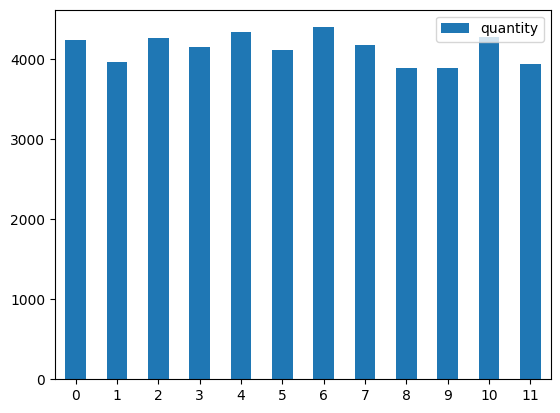

In [103]:
df_ventas_mes = df_ingresos_mes[['mes_nombre', 'quantity']]
ax = df_ventas_mes.plot.bar(rot=0)
#df_ingresos_mes.info()

In [97]:
df_ingresos_mes.reset_index()

,mes,mes_nombre,quantity,precio_total
0,1,Enero,4232,69793.30
1,2,Febrero,3961,65159.60
2,3,Marzo,4261,70397.10
3,4,Abril,4151,68736.80
4,5,Mayo,4328,71402.75
5,6,Junio,4107,68230.20
6,7,Julio,4392,72557.90
7,8,Agosto,4168,68278.25
8,9,Septiembre,3890,64180.05
9,10,Octubre,3883,64027.60
